# Downloading

In [52]:
import pandas as pd

In [ ]:
!cat >abc

^C


In [49]:
token = "..." #token-hidden
url = "https://api.github.com/users"
headers = {
    "Authorization": f"token {token}"
}

In [40]:
import requests as r
li=[]
s=-1
c=0

In [67]:
a=[]
for i in range(1,5):
  a.extend(r.get(f"https://api.github.com/search/users?page={i}&per_page=100&q=location:melbourne%20followers:%3E=100%20",headers=headers).json()['items'])

In [68]:
len(a)

337

In [69]:
b=[]
for i in a:
  b.append(r.get(f"https://api.github.com/users/{i['login']}",headers=headers).json())

In [71]:
data=pd.DataFrame(b)

In [83]:
data.columns

Index(['login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url',
       'html_url', 'followers_url', 'following_url', 'gists_url',
       'starred_url', 'subscriptions_url', 'organizations_url', 'repos_url',
       'events_url', 'received_events_url', 'type', 'user_view_type',
       'site_admin', 'name', 'company', 'blog', 'location', 'email',
       'hireable', 'bio', 'twitter_username', 'public_repos', 'public_gists',
       'followers', 'following', 'created_at', 'updated_at'],
      dtype='object')

In [92]:
users=data.loc[:,['login','name','company','location','email','hireable','bio','public_repos','followers','following','created_at']]

In [100]:
def company(x):
  if x==None:
    return None
  x=str(x)
  x=x.strip()
  x=x.strip("@")
  x=x.upper()
  return x

In [103]:
users['company']=users['company'].apply(company)

In [108]:
for i in data:
  pass

In [118]:
data['public_repos'].sum()

29746

In [116]:
repo=[]
for i in b:
  p=1
  q=(i['public_repos']//100)+2
  for x in range(p,q):
    repo.extend(r.get(f"https://api.github.com/users/{i['login']}/repos?page={x}&per_page=100",headers=headers).json())

In [119]:
rep=pd.DataFrame(repo)
rep.to_csv("repository.csv",index=False)

In [120]:
users.to_csv("users.csv",index=False)

In [125]:
repos=rep.loc[:,["owner","full_name","created_at","stargazers_count","watchers_count","language","has_projects","has_wiki","license","pushed_at"]]

In [128]:
repos

,owner,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license,pushed_at
0,"{'login': 'mosh-hamedani', 'id': 5441280, 'nod...",mosh-hamedani/angular-education,2017-08-10T05:30:30Z,22,22,None,True,True,None,2017-08-10T05:36:38Z
1,"{'login': 'mosh-hamedani', 'id': 5441280, 'nod...",mosh-hamedani/angular2-course,2016-02-15T22:59:37Z,130,130,TypeScript,True,True,None,2016-12-23T14:50:12Z
2,"{'login': 'mosh-hamedani', 'id': 5441280, 'nod...",mosh-hamedani/angularfire2,2016-09-06T00:06:45Z,15,15,TypeScript,True,True,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",2016-09-04T15:46:24Z
3,"{'login': 'mosh-hamedani', 'id': 5441280, 'nod...",mosh-hamedani/AngularJS2-Learning,2017-08-10T05:41:03Z,28,28,None,True,True,None,2017-08-10T05:42:13Z
4,"{'login': 'mosh-hamedani', 'id': 5441280, 'nod...",mosh-hamedani/awesome-angular,2017-08-10T05:45:49Z,35,35,HTML,True,True,"{'key': 'cc0-1.0', 'name': 'Creative Commons Z...",2017-08-10T05:49:30Z
...,...,...,...,...,...,...,...,...,...,...
29741,"{'login': 'keeganstreet', 'id': 513363, 'node_...",keeganstreet/sublime-specificity,2012-09-22T05:09:18Z,4,4,Python,True,True,None,2012-10-09T20:13:55Z
29742,"{'login': 'keeganstreet', 'id': 513363, 'node_...",keeganstreet/These-Days-jQuery-Slideshow-Plugin,2011-05-10T19:22:06Z,11,11,JavaScript,True,True,None,2023-12-03T08:57:53Z
29743,"{'login': 'keeganstreet', 'id': 513363, 'node_...",keeganstreet/urql,2022-11-08T02:50:49Z,0,0,None,True,False,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",2023-04-04T01:36:52Z
29744,"{'login': 'keeganstreet', 'id': 513363, 'node_...",keeganstreet/webpack-5-library,2021-03-02T02:01:48Z,0,0,JavaScript,True,True,None,2023-12-15T20:31:10Z


In [129]:
def login(x):
  return x['login']
repos['login']=repos['owner'].apply(login)

In [136]:
def time(x,par):
  if(x==None):
    return None
  if(par=="year"):
    return int(x[:4])
  elif(par=='month'):
    return int(x[5:7])
  elif(par=="day"):
    return int(x[8:10])
  elif(par=='hour'):
    return int(x[11:13])
  elif(par=='min'):
    return int(x[14:16])
  elif(par=='sec'):
    return int(x[17:19])

In [137]:
for i in ['year','month','day','hour','min','sec']:
  repos[i]=repos['pushed_at'].apply(lambda x:time(x,i))


In [139]:
repos.to_csv("reps.csv",index=False)

# Analysis

In [140]:
u=pd.read_csv('users.csv')

In [149]:
r=pd.read_csv('/content/repositories.csv')

In [147]:
u

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,mosh-hamedani,Mosh Hamedani,NaN,"Melbourne, Australia",NaN,NaN,I train software engineers that companies love...,27,12788,1,2013-09-12T04:38:33Z
1,TheCherno,Yan Chernikov,NaN,"Melbourne, Australia",NaN,NaN,NaN,35,11235,4,2012-02-26T08:39:00Z
2,haileys,Hailey Somerville,NaN,Naarm / Melbourne,hailey@hailey.lol,NaN,NaN,372,9391,104,2010-01-09T14:49:23Z
3,rstacruz,Rico Sta. Cruz,NaN,"Melbourne, AU",NaN,True,@rstacruz@hachyderm.io,562,6435,25,2009-04-16T09:46:24Z
4,jesseduffield,Jesse Duffield,NaN,Melbourne,jessedduffield@gmail.com,NaN,"Creator of lazygit, lazydocker, horcrux, and t...",60,4580,4,2014-08-15T09:18:18Z
...,...,...,...,...,...,...,...,...,...,...,...
332,silviocesare,Silvio Cesare,INFOSECT,"Melbourne, Australia",NaN,NaN,NaN,18,100,0,2010-11-10T09:20:19Z
333,DungLai,Tuan Dung Lai,NaN,"Melbourne, Australia",tuandunglai@gmail.com,True,NaN,18,100,0,2017-04-12T07:51:44Z
334,tdmalone,Tim Malone,KABLAMOOSS,"Melbourne, Australia",NaN,NaN,"DevOps Engineer in Melbourne, Australia",40,100,277,2011-07-07T12:24:30Z
335,ineffyble,Effy Elden,THOUGHTWORKS,"Melbourne, Australia",effy@effy.space,NaN,techie enby nerd,107,100,41,2011-06-07T11:18:41Z


In [212]:
r

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
0,mosh-hamedani,mosh-hamedani/angular-education,2017-08-10T05:30:30Z,22,22,NaN,True,True,NaN
1,mosh-hamedani,mosh-hamedani/angular2-course,2016-02-15T22:59:37Z,130,130,TypeScript,True,True,NaN
2,mosh-hamedani,mosh-hamedani/angularfire2,2016-09-06T00:06:45Z,15,15,TypeScript,True,True,MIT License
3,mosh-hamedani,mosh-hamedani/AngularJS2-Learning,2017-08-10T05:41:03Z,28,28,NaN,True,True,NaN
4,mosh-hamedani,mosh-hamedani/awesome-angular,2017-08-10T05:45:49Z,35,35,HTML,True,True,Creative Commons Zero v1.0 Universal
...,...,...,...,...,...,...,...,...,...
29236,roachhd,roachhd/holmon-dotfiles,2014-11-10T23:25:26Z,0,0,NaN,True,False,MIT License
29237,roachhd,roachhd/github-activity,2014-10-27T23:23:43Z,1,1,NaN,True,True,MIT License
29238,roachhd,roachhd/roachhaus-privacy,2014-10-10T11:02:02Z,1,1,NaN,True,True,NaN
29239,roachhd,roachhd/fartscroll.js,2014-10-27T15:15:32Z,0,0,NaN,True,True,MIT License


In [144]:
u.sort_values(by=[])

Object `u.sort_by` not found.


In [151]:
r['license_name'].value_counts()

,count
license_name,
MIT License,8524
Other,2472
Apache License 2.0,1839
GNU General Public License v3.0,738
"BSD 3-Clause ""New"" or ""Revised"" License",646
GNU General Public License v2.0,311
"BSD 2-Clause ""Simplified"" License",174
ISC License,164
Creative Commons Zero v1.0 Universal,161


In [152]:
u['company'].value_counts()

,count
company,
MONASH UNIVERSITY,8
MICROSOFT,5
ATLASSIAN,4
UNIVERSITY OF MELBOURNE,3
CANVA,3
...,...
HARRISON.AI,1
PATCHMYPCTEAM,1
SERIOUS BUSINESS,1


In [153]:
r['language'].value_counts()

,count
language,
JavaScript,5852
Ruby,2165
Python,2036
TypeScript,1140
Go,1045
...,...
Less,1
Ragel in Ruby Host,1
YASnippet,1


In [154]:
def after(x):
  if(int(x[:4])>2020):
    return True
  else:
    return False

In [155]:
f=u[u['created_at'].apply(after)]

In [161]:
f

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
96,AndiiCodes,AndiiCodes,RMIT UNIVERSITY,"Melbourne, Australia",NaN,True,Jr. Front-End Dev,9,299,29,2022-10-26T23:50:19Z
180,feit-comp30023-2024,comp30023-2024,THE UNIVERSITY OF MELBOURNE,"Melbourne, Australia",NaN,NaN,Faculty of Engineering and Information Technol...,0,170,0,2024-02-26T04:25:41Z
185,rmit-computing-technologies,RMIT School of Computing Technologies,NaN,"Melbourne, Victoria",NaN,NaN,NaN,4,167,0,2021-04-06T13:20:48Z
213,NiREvil,Ransomware Evil,RAYAN EL,"Australia, Melbourne",NaN,NaN,phD EW,27,149,22,2023-02-24T09:57:18Z
226,nataliethenerd,NaN,NaN,"Melbourne, Australia",NaN,NaN,self taught baby programmer and maker\r\n\r\ns...,17,141,26,2021-02-20T05:30:10Z
294,Adnan25z,Adnan,NaN,"Melbourne, Australia",NaN,True,NaN,21,114,121,2022-03-04T00:24:59Z
303,TrustAGI-Lab,Trustworthy AGI (TrustAGI) Lab,NaN,"Melbourne, Australia",NaN,NaN,"TrustAGI Lab, Led by Shirui Pan",32,112,0,2021-05-12T03:37:09Z
314,Zemerik,Hemang Yadav,OPEN SOURCE DEVELOPER,"Melbourne, Australia",zemerikY@gmail.com,True,💻Passionate Developer + 💪Expertise in Web-Deve...,17,107,23,2023-05-17T10:09:26Z
319,ziplab,Zhuang Intelligent Processing Lab,NaN,"Melbourne, Australia",NaN,NaN,NaN,23,104,0,2021-02-25T11:28:36Z


In [206]:
def namein(x):
  if x in f['login'].unique():
   return True
  else:
    return False


In [208]:
pr=r[r['login'].apply(namein)]

In [211]:
pr['language'].value_counts()

,count
language,
Python,35
JavaScript,18
HTML,6
Astro,5
C++,4
C#,4
TypeScript,4
Java,3
CSS,2


In [214]:
tab=pd.pivot_table(r,'stargazers_count',index='language')

In [231]:
aa,bb=[],[]
for i in r['language'].unique():
  temp=r[r['language']==i]
  aa.append(i)
  bb.append(temp['stargazers_count'].mean())

In [236]:
import numpy as np
pd.DataFrame(np.array([bb]),columns=aa).T

,0
NaN,NaN
TypeScript,46.221930
HTML,7.845445
JavaScript,24.305707
Python,21.414538
...,...
Nextflow,0.800000
Pep8,0.000000
Mercury,3.250000
M,0.000000


In [240]:
df=u.loc[:,['login','followers','following']]

In [242]:
df['ls']=df['followers']/(1+df['following'])

In [243]:
df

,login,followers,following,ls
0,mosh-hamedani,12788,1,6394.000000
1,TheCherno,11235,4,2247.000000
2,haileys,9391,104,89.438095
3,rstacruz,6435,25,247.500000
4,jesseduffield,4580,4,916.000000
...,...,...,...,...
332,silviocesare,100,0,100.000000
333,DungLai,100,0,100.000000
334,tdmalone,100,277,0.359712
335,ineffyble,100,41,2.380952


In [251]:
np.corrcoef(u['followers'],u['public_repos'])

array([[1.        , 0.18921482],
       [0.18921482, 1.        ]])

In [257]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(np.array(u['public_repos']).reshape(-1,1),np.array(u['followers']).reshape(-1,1))

In [258]:
lr.intercept_

array([250.9069959])

In [259]:
lr.coef_

array([[2.25624764]])

In [260]:
from matplotlib import pyplot as plt

(100.0, 600.0)

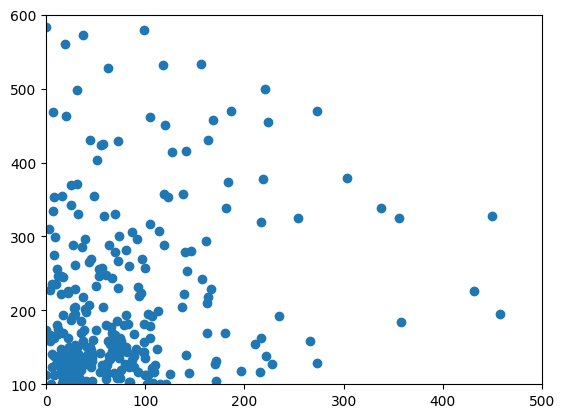

In [264]:
plt.scatter(u['public_repos'],u['followers'])
plt.xlim(0,500)
plt.ylim(100,600)

In [277]:
yn=lambda x:int(x==True)

In [268]:
np.corrcoef(r['has_projects'].apply(yn),r['has_wiki'].apply(yn))

array([[1.    , 0.3794],
       [0.3794, 1.    ]])

In [273]:
temp=u.loc[:,['hireable','following']]

In [279]:
temp['hr']=temp['hireable'].apply(yn)

In [280]:
temp

,hireable,following,hr
0,NaN,1,0
1,NaN,4,0
2,NaN,104,0
3,True,25,1
4,NaN,4,0
...,...,...,...
332,NaN,0,0
333,True,0,1
334,NaN,277,0
335,NaN,41,0


In [281]:
temp[temp['hr']==0]['following'].mean()

142.9469387755102

In [282]:
temp[temp['hr']==1]['following'].mean()

96.78260869565217

In [283]:
96.78260869565217-142.9469387755102

-46.16433007985803

In [293]:
te1=u.loc[:,['bio','followers']]

In [296]:
te1=te1[~te1['bio'].isna()]

In [303]:
te1['bl']=te1['bio'].apply(lambda x:len(x.split(" ")))

<ipython-input-303-d7eb8dd4672d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te1['bl']=te1['bio'].apply(lambda x:len(x.split(" ")))


In [304]:
te1

,bio,followers,bl
0,I train software engineers that companies love...,12788,10
3,@rstacruz@hachyderm.io,6435,1
4,"Creator of lazygit, lazydocker, horcrux, and t...",4580,9
5,Creating educational developer content and cod...,3995,8
6,🦄 CSS Modules co-creator / 💿 @remix-run at @sh...,3149,25
...,...,...,...
328,Red teamer,101,2
329,- Automate processes cross platform & optimize...,101,54
331,Head of Engineering,101,3
334,"DevOps Engineer in Melbourne, Australia",100,5


In [305]:
lr1=LinearRegression().fit(np.array(te1['bl']).reshape(-1,1),np.array(te1['followers']).reshape(-1,1))

In [306]:
lr1.coef_

array([[6.28822111]])

In [307]:
r.head()

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
0,mosh-hamedani,mosh-hamedani/angular-education,2017-08-10T05:30:30Z,22,22,NaN,True,True,NaN
1,mosh-hamedani,mosh-hamedani/angular2-course,2016-02-15T22:59:37Z,130,130,TypeScript,True,True,NaN
2,mosh-hamedani,mosh-hamedani/angularfire2,2016-09-06T00:06:45Z,15,15,TypeScript,True,True,MIT License
3,mosh-hamedani,mosh-hamedani/AngularJS2-Learning,2017-08-10T05:41:03Z,28,28,NaN,True,True,NaN
4,mosh-hamedani,mosh-hamedani/awesome-angular,2017-08-10T05:45:49Z,35,35,HTML,True,True,Creative Commons Zero v1.0 Universal


In [308]:
temp=u.loc[:,['hireable','email']]
temp['hr']=temp['hireable'].apply(yn)

In [316]:
temp['em']=temp['email'].isna().apply(yn)

In [328]:
t1=temp[temp['hr']==1]
t1=t1[t1['em']==0]
t2=temp[temp['hr']==0]
t2=t1[t1['em']==0]

In [329]:
t1.count()

,0
hireable,45
email,45
hr,45
em,45


In [330]:
t2.count()

,0
hireable,45
email,45
hr,45
em,45


In [334]:
temp[temp['em']==0][temp[temp['em']==0]['hr']==0].shape

(106, 4)

In [335]:
45,106

(45, 106)

In [336]:
(45-106)/151

-0.40397350993377484

In [348]:
def nm(x):
  try:
    return(x.strip().split(" ")[-1])
  except:
    print(x)

In [349]:
xx=u['name'].dropna().apply(nm)

In [350]:
xx.value_counts()

,count
name,
Wang,3
Jackson,3
Lab,2
Wu,2
Inc,2
...,...
Oxer,1
Malseed,1
Sbarski,1
